# Data Exploration of a 'Nifty50' based DataSet

In [23]:
using DataFrames
using CSV
using Statistics  
using Plots, StatsPlots

In [4]:
DATA = CSV.read("nifty50.csv",DataFrame)

,index,date,time,open,high,low,close
,String,Int64,Time…,Float64,Float64,Float64,Float64
1,NIFTY,20130401,09:16:00,5701.15,5704.65,5694.3,5697.0
2,NIFTY,20130401,09:17:00,5697.05,5698.35,5695.65,5697.5
3,NIFTY,20130401,09:18:00,5697.9,5697.9,5690.6,5692.15
4,NIFTY,20130401,09:19:00,5691.65,5694.7,5691.65,5693.9
5,NIFTY,20130401,09:20:00,5694.4,5695.05,5693.35,5694.55
6,NIFTY,20130401,09:21:00,5694.1,5700.05,5694.1,5697.2
7,NIFTY,20130401,09:22:00,5697.25,5701.4,5697.1,5700.3
8,NIFTY,20130401,09:23:00,5700.35,5700.35,5697.2,5699.25
9,NIFTY,20130401,09:24:00,5699.2,5701.55,5697.75,5701.25


In [22]:
head(DATA,30)

,index,date,time,open,high,low,close
,String,Int64,Time…,Float64,Float64,Float64,Float64
1,NIFTY,20130401,09:16:00,5701.15,5704.65,5694.3,5697.0
2,NIFTY,20130401,09:17:00,5697.05,5698.35,5695.65,5697.5
3,NIFTY,20130401,09:18:00,5697.9,5697.9,5690.6,5692.15
4,NIFTY,20130401,09:19:00,5691.65,5694.7,5691.65,5693.9
5,NIFTY,20130401,09:20:00,5694.4,5695.05,5693.35,5694.55
6,NIFTY,20130401,09:21:00,5694.1,5700.05,5694.1,5697.2
7,NIFTY,20130401,09:22:00,5697.25,5701.4,5697.1,5700.3
8,NIFTY,20130401,09:23:00,5700.35,5700.35,5697.2,5699.25
9,NIFTY,20130401,09:24:00,5699.2,5701.55,5697.75,5701.25


In [6]:
tail(DATA)

,index,date,time,open,high,low,close
,String,Int64,Time…,Float64,Float64,Float64,Float64
1,NIFTY,20160930,15:25:00,8615.6,8618.4,8615.35,8617.75
2,NIFTY,20160930,15:26:00,8618.0,8619.85,8617.65,8618.5
3,NIFTY,20160930,15:27:00,8618.45,8618.95,8617.25,8617.25
4,NIFTY,20160930,15:28:00,8617.2,8618.65,8616.85,8617.5
5,NIFTY,20160930,15:29:00,8617.4,8618.8,8615.6,8616.65
6,NIFTY,20160930,15:30:00,8615.3,8622.75,8615.3,8620.95


In [7]:
# Using describe function to get statistics of a particular column in a dataset 
describe(DATA)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,index,,NIFTY,,NIFTY,1,,String
2,date,2.0145e7,20130101,2.01412e7,20160930,,,Int64
3,time,,09:16:00,,19:30:00,436,,Time
4,open,7374.52,5126.15,7738.8,9115.4,,,Float64
5,high,7376.08,5127.25,7740.15,9119.2,,,Float64
6,low,7372.94,5118.85,7737.45,9105.65,,,Float64
7,close,7374.5,5126.3,7738.8,9106.5,,,Float64


In [8]:
describe(DATA, :mean, cols=:open)

,variable,mean
,Symbol,Float64
1,open,7374.52


In [9]:

describe(DATA, :median, cols=:high)

,variable,median
,Symbol,Float64
1,high,7740.15


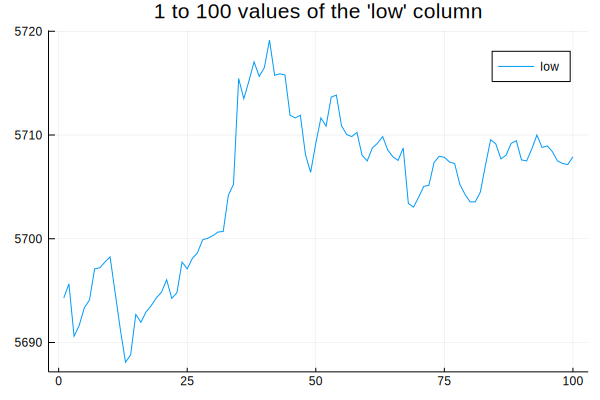

In [20]:
x1=[1:100]
y1=DATA[1:100, :low]
plot(x1,y1,title = "1 to 100 values of the 'low' column", label="low")

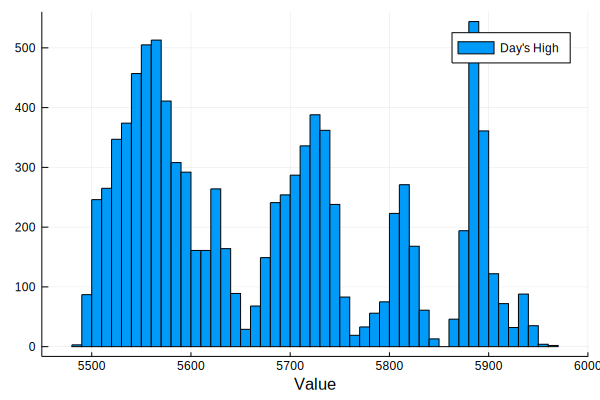

In [11]:
Plots.histogram(DATA[500:10000, :high],bins = 50, xlabel = "Value",  labels = "Day's High")

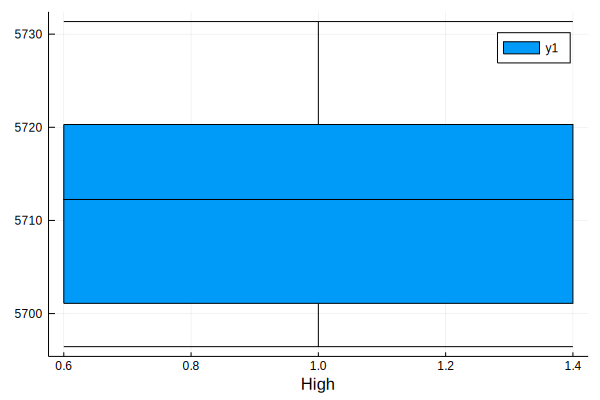

In [14]:
#Boxplot  
Plots.boxplot(DATA[500:600,:high],xlabel = "High")

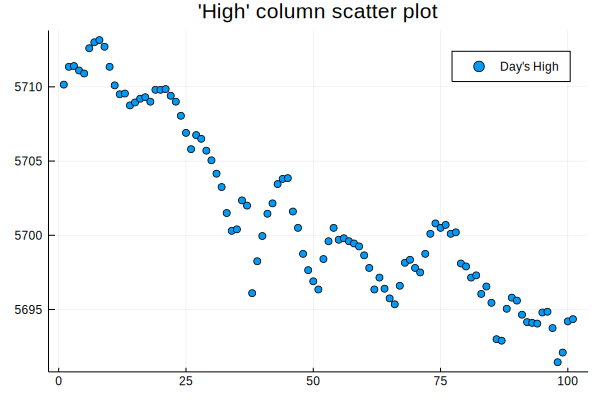

In [26]:
# Plot Scatterplot 
plot(DATA[100:200,:high],  
     seriestype = :scatter, 
     title = "'High' column scatter plot ",
     labels = "Day's High")